# Milestone 2: baseline models
___

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import import_preprocess, baseline_models, evaluate
from importlib import reload
reload(import_preprocess)
reload(baseline_models)
reload(evaluate)

from import_preprocess import ImportPreprocess, convert_labels_to_string, convert_labels_to_int
from baseline_models import XGBoostClassifier, MajorityClassClassifier, NaiveBayesClassifier, LogisticRegression, LSTM_Model, get_all_predictions

In [26]:
import_preprocess = ImportPreprocess()
import_preprocess.import_train_val_test()

X_train, y_train = import_preprocess.X_train, import_preprocess.y_train
X_val, y_val = import_preprocess.X_val, import_preprocess.y_val
X_test, y_test = import_preprocess.X_test, import_preprocess.y_test
X_balanced, y_balanced = import_preprocess.create_balanced_dataset(X_train, y_train, n_samples=5000)

print("Number of training samples:", len(X_train)) 
print("Number of validation samples:", len(X_val))
print("Number of test samples:", len(X_test)) 
print("Number of balanced samples:", len(X_balanced))

Number of training samples: 14000
Number of validation samples: 2000
Number of test samples: 4000
Number of balanced samples: 10000


In [3]:
# import_preprocess.convert_class_labels()
# y_train, y_dev, y_test = import_preprocess.y_train, import_preprocess.y_dev, import_preprocess.y_test

In [4]:
#X_train_dev, y_train_val = import_preprocess.concatenate_train_val()
#len(X_train_dev)

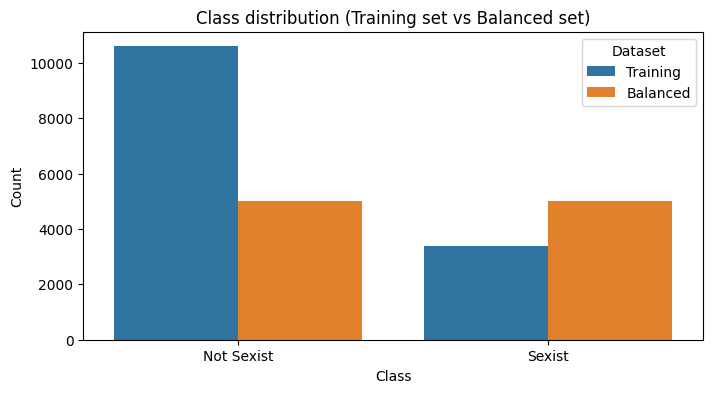

In [5]:
plot_data = pd.DataFrame({
    'Class': ['Not Sexist', 'Sexist'],
    'Training': [y_train.count('not sexist'), y_train.count('sexist')],
    'Balanced': [y_balanced.count('not sexist'), y_balanced.count('sexist')]
})
plot_data_melted = plot_data.melt(id_vars='Class', var_name='Dataset', value_name='Count')
plt.figure(figsize=(8, 4))
sns.barplot(x='Class', y='Count', hue='Dataset', data=plot_data_melted)
plt.title('Class distribution (Training set vs Balanced set)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [27]:
results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Balanced_Accuracy', 'Precision', 'Recall'])
balanced_results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Balanced_Accuracy', 'Precision', 'Recall'])

#### a) Traditional (non-DL) baseline models

1. majority class classifier

Majority class: not sexist

########################################

Metrics for training
accuracy: 0.7573
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################

Metrics for validation
accuracy: 0.7570
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################



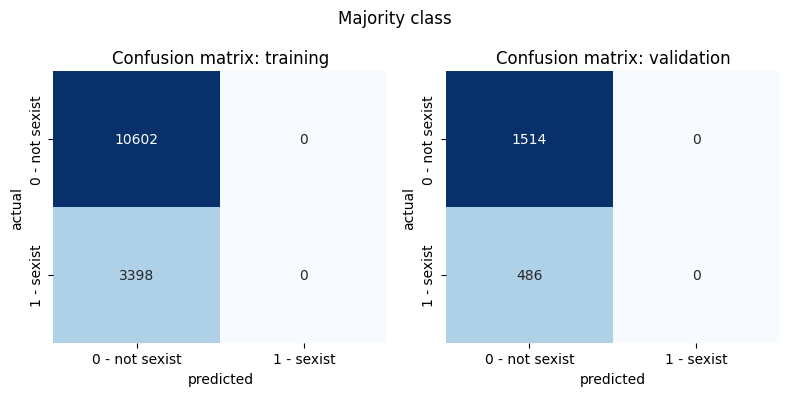

In [7]:
majority_class_classifier = MajorityClassClassifier()
majority_class_classifier.train(None, y_train, None, None)
print(f"Majority class: {majority_class_classifier.majority_class}\n")

res = majority_class_classifier.evaluate({"training": X_train, "validation": X_val}, [y_train, y_val], model_name="Majority class")
for res_x in res:
    results.loc[len(results)] = res_x

Majority class: not sexist

########################################

Metrics for training
accuracy: 0.5000
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################

Metrics for validation
accuracy: 0.7570
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################



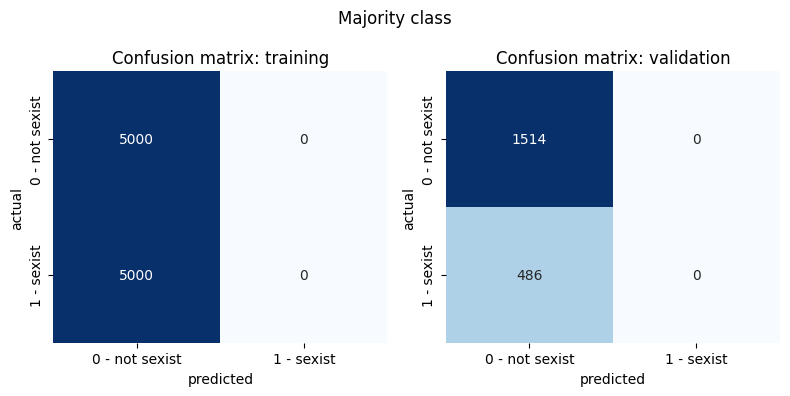

In [8]:
majority_class_classifier.train(None, y_balanced, None, None)
print(f"Majority class: {majority_class_classifier.majority_class}\n")

res = majority_class_classifier.evaluate({"training": X_balanced, "validation": X_val}, [y_balanced, y_val], model_name="Majority class")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

2. regex classifier

3. Naive Bayes (NB)

########################################

Metrics for training
accuracy: 0.8167
balanced accuracy: 0.6664
precision: 0.7430
recall: 0.3743

########################################

Metrics for validation
accuracy: 0.7975
balanced accuracy: 0.6301
precision: 0.6884
recall: 0.3045

########################################



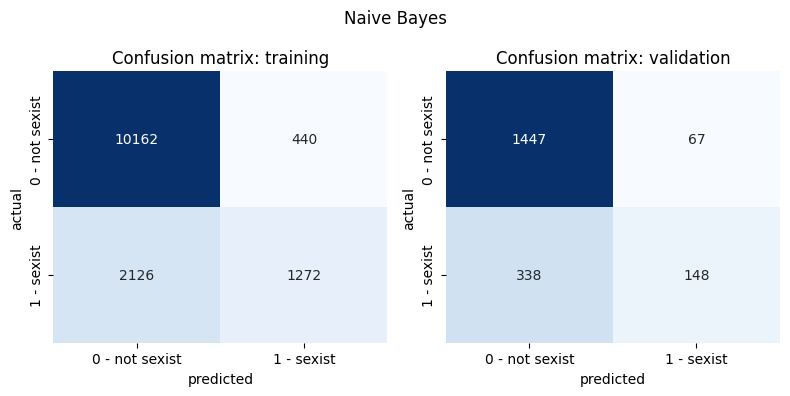

In [9]:
X_train_bow, X_val_bow, X_test_bow, X_balanced_bow, X_train_val_bow, feature_names = import_preprocess.create_bow_representation()

naive_bayes_classifier = NaiveBayesClassifier()
naive_bayes_classifier.train(X_train_bow, y_train, None, None)

res = naive_bayes_classifier.evaluate({"training": X_train_bow, "validation": X_val_bow}, [y_train, y_val], model_name="Naive Bayes")
for res_x in res:
    results.loc[len(results)] = res_x

########################################

Metrics for training
accuracy: 0.5653
balanced accuracy: 0.5653
precision: 0.5668
recall: 0.5538

########################################

Metrics for validation
accuracy: 0.4970
balanced accuracy: 0.5015
precision: 0.2441
recall: 0.5103

########################################



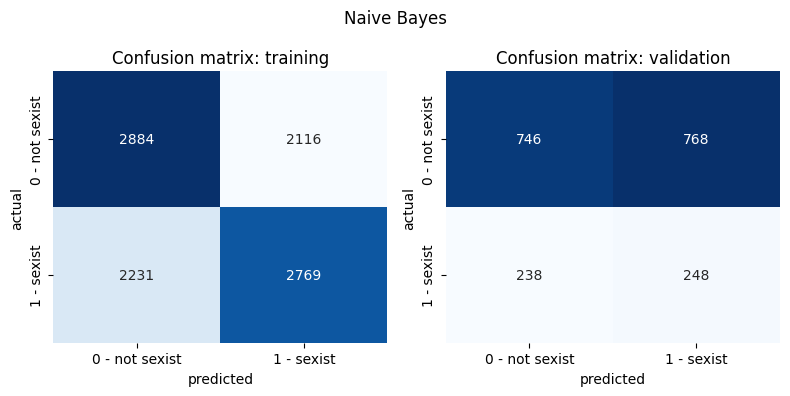

In [10]:
naive_bayes_classifier.train(X_balanced_bow, y_balanced, None, None)

res = naive_bayes_classifier.evaluate({"training": X_balanced_bow, "validation": X_val_bow}, [y_balanced, y_val], model_name="Naive Bayes")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

4. Logisitic Regression

########################################

Metrics for training
accuracy: 0.8218
balanced accuracy: 0.6630
precision: 0.8000
recall: 0.3543

########################################

Metrics for validation
accuracy: 0.8045
balanced accuracy: 0.6271
precision: 0.7654
recall: 0.2819

########################################



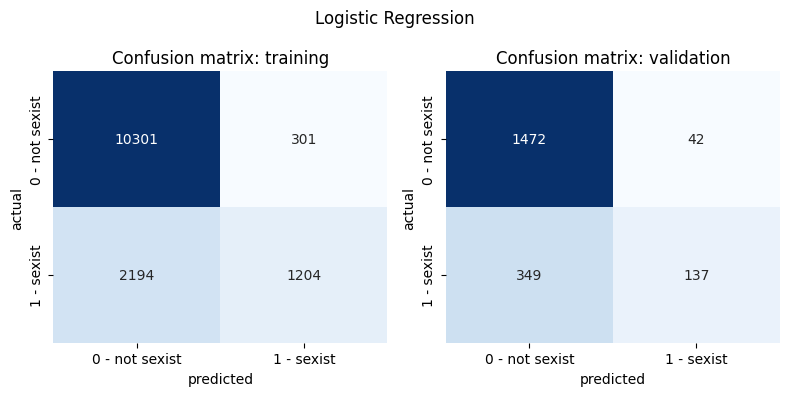

In [11]:
log_reg_classifier = LogisticRegression()
log_reg_classifier.train(X_train_bow, y_train, None, None)

res = log_reg_classifier.evaluate({"training": X_train_bow, "validation": X_val_bow}, [y_train, y_val], model_name="Logistic Regression")
for res_x in res:
    results.loc[len(results)] = res_x

########################################

Metrics for training
accuracy: 0.5680
balanced accuracy: 0.5680
precision: 0.5702
recall: 0.5520

########################################

Metrics for validation
accuracy: 0.5025
balanced accuracy: 0.5030
precision: 0.2452
recall: 0.5041

########################################



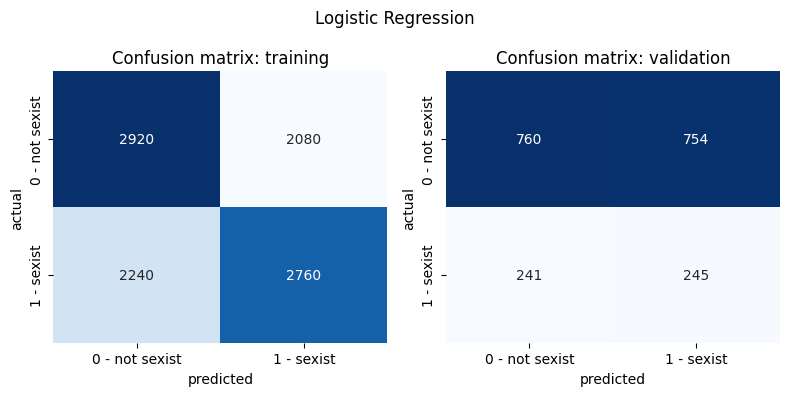

In [12]:
log_reg_classifier.train(X_balanced_bow, y_balanced, None, None)

res = log_reg_classifier.evaluate({"training": X_balanced_bow, "validation": X_val_bow}, [y_balanced, y_val], model_name="Logistic Regression")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

5. XGBoost (using BoW representation)

[0]	train-logloss:0.53193	eval-logloss:0.53723
[1]	train-logloss:0.51431	eval-logloss:0.52352
[2]	train-logloss:0.50007	eval-logloss:0.51216
[3]	train-logloss:0.48820	eval-logloss:0.50334
[4]	train-logloss:0.47855	eval-logloss:0.49671
[5]	train-logloss:0.47021	eval-logloss:0.49069
[6]	train-logloss:0.46321	eval-logloss:0.48565
[7]	train-logloss:0.45708	eval-logloss:0.48162
[8]	train-logloss:0.45157	eval-logloss:0.47800
[9]	train-logloss:0.44715	eval-logloss:0.47518
[10]	train-logloss:0.44303	eval-logloss:0.47317
[11]	train-logloss:0.43920	eval-logloss:0.47105
[12]	train-logloss:0.43602	eval-logloss:0.46948
[13]	train-logloss:0.43282	eval-logloss:0.46714
[14]	train-logloss:0.43031	eval-logloss:0.46602
[15]	train-logloss:0.42782	eval-logloss:0.46496
[16]	train-logloss:0.42549	eval-logloss:0.46407
[17]	train-logloss:0.42322	eval-logloss:0.46317
[18]	train-logloss:0.42098	eval-logloss:0.46199


c:\Users\jogip\OneDrive - TU Wien\Master\Natural Language Processing\NLP_24W_VSHJ\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:55:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[19]	train-logloss:0.41915	eval-logloss:0.46103
[20]	train-logloss:0.41745	eval-logloss:0.46053
[21]	train-logloss:0.41599	eval-logloss:0.45983
[22]	train-logloss:0.41407	eval-logloss:0.45950
[23]	train-logloss:0.41194	eval-logloss:0.45936
[24]	train-logloss:0.41034	eval-logloss:0.45900
[25]	train-logloss:0.40895	eval-logloss:0.45835
[26]	train-logloss:0.40769	eval-logloss:0.45837
[27]	train-logloss:0.40617	eval-logloss:0.45822
[28]	train-logloss:0.40462	eval-logloss:0.45830
[29]	train-logloss:0.40329	eval-logloss:0.45766
[30]	train-logloss:0.40199	eval-logloss:0.45758
[31]	train-logloss:0.40081	eval-logloss:0.45708
[32]	train-logloss:0.39970	eval-logloss:0.45705
[33]	train-logloss:0.39871	eval-logloss:0.45696
[34]	train-logloss:0.39756	eval-logloss:0.45708
[35]	train-logloss:0.39661	eval-logloss:0.45697
[36]	train-logloss:0.39575	eval-logloss:0.45689
[37]	train-logloss:0.39457	eval-logloss:0.45659
[38]	train-logloss:0.39364	eval-logloss:0.45668
[39]	train-logloss:0.39237	eval-logloss:

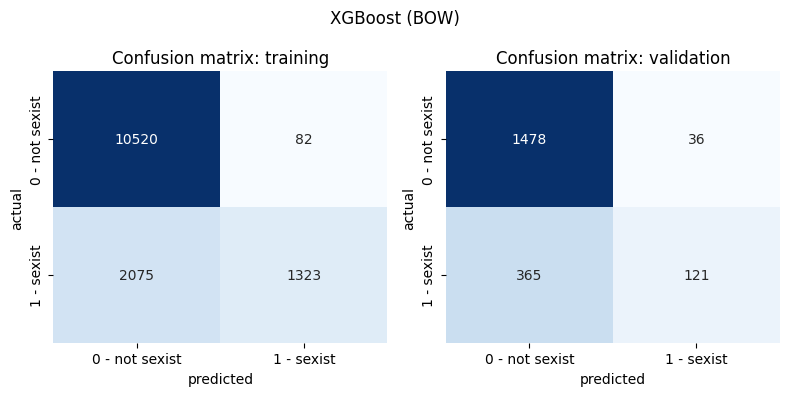

In [13]:
xg_boost_bow = XGBoostClassifier()
xg_boost_bow.train(X_train_bow, y_train, X_val_bow, y_val)

res = xg_boost_bow.evaluate({"training": X_train_bow, "validation": X_val_bow}, [y_train, y_val], model_name="XGBoost (BOW)")
for res_x in res:
    results.loc[len(results)] = res_x

[0]	train-logloss:0.69076	eval-logloss:0.69334
[1]	train-logloss:0.68867	eval-logloss:0.69356
[2]	train-logloss:0.68662	eval-logloss:0.69367
[3]	train-logloss:0.68512	eval-logloss:0.69309
[4]	train-logloss:0.68348	eval-logloss:0.69362
[5]	train-logloss:0.68222	eval-logloss:0.69351
[6]	train-logloss:0.68036	eval-logloss:0.69318
[7]	train-logloss:0.67855	eval-logloss:0.69301
[8]	train-logloss:0.67729	eval-logloss:0.69282
[9]	train-logloss:0.67603	eval-logloss:0.69273
[10]	train-logloss:0.67468	eval-logloss:0.69279
[11]	train-logloss:0.67338	eval-logloss:0.69316
[12]	train-logloss:0.67218	eval-logloss:0.69419
[13]	train-logloss:0.67015	eval-logloss:0.69420
[14]	train-logloss:0.66871	eval-logloss:0.69440
[15]	train-logloss:0.66737	eval-logloss:0.69461
[16]	train-logloss:0.66625	eval-logloss:0.69493
[17]	train-logloss:0.66512	eval-logloss:0.69497
[18]	train-logloss:0.66438	eval-logloss:0.69489


c:\Users\jogip\OneDrive - TU Wien\Master\Natural Language Processing\NLP_24W_VSHJ\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:55:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


########################################

Metrics for training
accuracy: 0.6233
balanced accuracy: 0.6233
precision: 0.6646
recall: 0.4978

########################################

Metrics for validation
accuracy: 0.5670
balanced accuracy: 0.5149
precision: 0.2570
recall: 0.4136

########################################



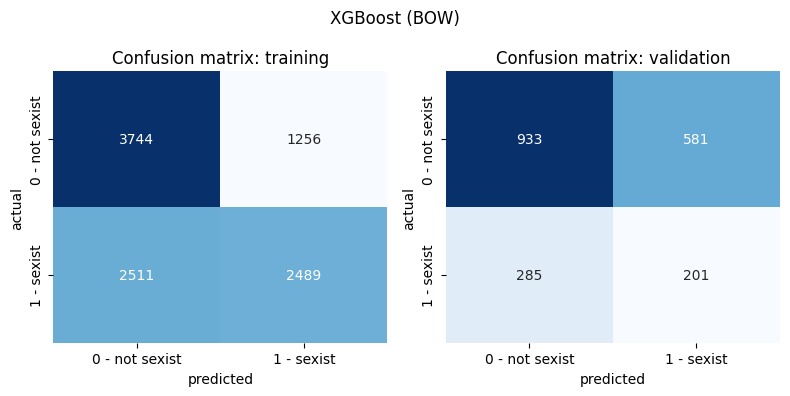

In [14]:
xg_boost_bow.train(X_balanced_bow, y_balanced, X_val_bow, y_val)

res = xg_boost_bow.evaluate({"training": X_balanced_bow, "validation": X_val_bow}, [y_balanced, y_val], model_name="XGBoost (BOW)")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

5. XGBoost (word embeddings representation)

#### b) DL baseline models

1. LSTM

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.7538 - loss: 0.5628 - val_accuracy: 0.7565 - val_loss: 0.5557
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7631 - loss: 0.5372 - val_accuracy: 0.7910 - val_loss: 0.4884
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8130 - loss: 0.4430 - val_accuracy: 0.8015 - val_loss: 0.4989
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8650 - loss: 0.3542 - val_accuracy: 0.8255 - val_loss: 0.4328
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8820 - loss: 0.3208 - val_accuracy: 0.8300 - val_loss: 0.4081
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9015 - loss: 0.2735 - val_accuracy: 0.8380 - val_loss: 0.4195
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9134 - loss: 0.2487 - val_accuracy: 0.8255 - val_loss: 0.4397
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9233 - loss: 0.2224 - 

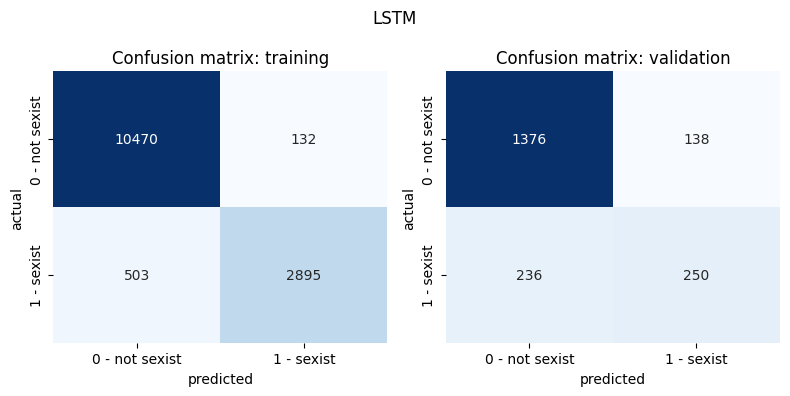

In [28]:
y_train = convert_labels_to_int(y_train)
y_balanced = convert_labels_to_int(y_balanced)
y_val = convert_labels_to_int(y_val)

rnn = LSTM_Model()
rnn.train(X_train, y_train, X_val, y_val)
res = rnn.evaluate({"training": X_train, "validation": X_val}, [y_train, y_val], model_name="LSTM")
for res_x in res:
    results.loc[len(results)] = res_x

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.4970 - loss: 0.6940 - val_accuracy: 0.2430 - val_loss: 0.6973
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4951 - loss: 0.6934 - val_accuracy: 0.7570 - val_loss: 0.6879
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.5024 - loss: 0.6933 - val_accuracy: 0.7440 - val_loss: 0.6921
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5027 - loss: 0.6933 - val_accuracy: 0.7450 - val_loss: 0.6695
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5659 - loss: 0.6788 - val_accuracy: 0.6125 - val_loss: 0.6830
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7455 - loss: 0.5578 - val_accuracy: 0.5635 - val_loss: 0.8590
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8230 - loss: 0.4540 - val_accuracy: 0.7710 - val_loss: 0.5252
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8642 - loss: 0.3546 - val_acc

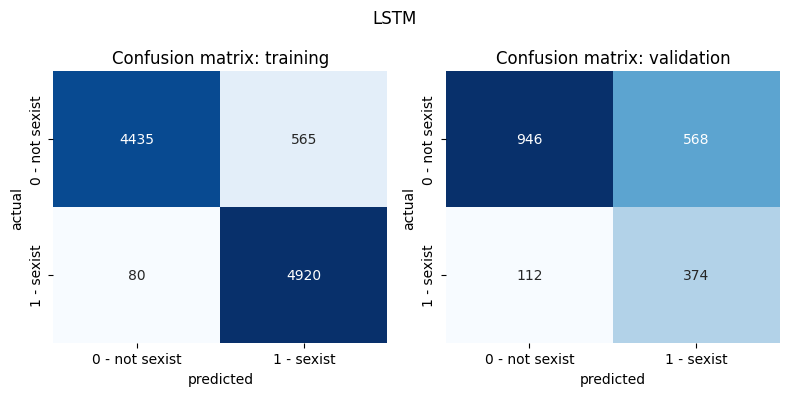

In [16]:
rnn.train(X_balanced, y_balanced, X_val, y_val)
res = rnn.evaluate({"training": X_balanced, "validation": X_val}, [y_balanced, y_val], model_name="LSTM")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

## Results

In [17]:
results

,Model,Dataset,Accuracy,Balanced_Accuracy,Precision,Recall
0,Majority class,training,0.757286,0.500000,0.000000,0.000000
1,Majority class,validation,0.757000,0.500000,0.000000,0.000000
2,Naive Bayes,training,0.816714,0.666418,0.742991,0.374338
3,Naive Bayes,validation,0.797500,0.630137,0.688372,0.304527
4,Logistic Regression,training,0.821786,0.662968,0.800000,0.354326
5,Logistic Regression,validation,0.804500,0.627076,0.765363,0.281893
6,XGBoost (BOW),training,0.845929,0.690806,0.941637,0.389347
7,XGBoost (BOW),validation,0.799500,0.612597,0.770701,0.248971
8,LSTM,training,0.955286,0.934883,0.918478,0.895232
9,LSTM,validation,0.795000,0.718599,0.579498,0.569959


In [ ]:
balanced_results

,Model,Dataset,Accuracy,Balanced_Accuracy,Precision,Recall
0,Majority class,training,0.5000,0.500000,0.000000,0.000000
1,Majority class,validation,0.7570,0.500000,0.000000,0.000000
2,Naive Bayes,training,0.5653,0.565300,0.566837,0.553800
3,Naive Bayes,validation,0.4970,0.501511,0.244094,0.510288
4,Logistic Regression,training,0.5680,0.568000,0.570248,0.552000
5,Logistic Regression,validation,0.5025,0.503048,0.245245,0.504115
6,XGBoost (BOW),training,0.6233,0.623300,0.664619,0.497800
7,XGBoost (BOW),validation,0.5670,0.514914,0.257033,0.413580
8,LSTM,training,0.9355,0.935500,0.896992,0.984000
9,LSTM,validation,0.6600,0.697191,0.397028,0.769547


In [23]:
models_dict = {
    "Majority Class": majority_class_classifier,
    "Naive Bayes": naive_bayes_classifier,
    "Logistic Regression": log_reg_classifier,
    "XGBoost (BOW)": xg_boost_bow,
    "LSTM": rnn
}

predictions = get_all_predictions(models_dict, X_val[1], X_val_bow[1], y_val[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [24]:
predictions

{'true': 'not sexist',
 'Majority Class': ['not sexist'],
 'Naive Bayes': array(['not sexist'], dtype='<U10'),
 'Logistic Regression': array(['not sexist'], dtype='<U10'),
 'XGBoost (BOW)': ['not sexist'],
 'LSTM': 'not sexist'}

In [ ]:
# get all actual "sexist" observations that were classified as "not sexist" by the LSTM model
y_pred = rnn.predict(X_val)
y_pred = convert_labels_to_string(y_pred)
y_val = convert_labels_to_string(y_val)
false_negatives = [X_val[i] for i in range(len(X_val)) if y_val[i] == 'sexist' and y_pred[i] == 'not sexist']

false_negatives

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[['agree',
  'time',
  'know',
  'well',
  'enough',
  'say',
  'cant',
  'love',
  'woman',
  '.',
  'minute',
  'she',
  'begins',
  'hit',
  'wall',
  'hotter',
  ',',
  'younger',
  'women',
  'enters',
  'picture',
  ',',
  'time',
  'impulse',
  'control',
  'im',
  'going',
  'want',
  '.'],
 ['aim', 'head', 'she', 'dos', "n't", 'come', 'back'],
 ['guys',
  'gon',
  'na',
  'great',
  'time',
  'barracks',
  '.',
  "n't",
  'know',
  'he',
  ',',
  'first',
  'time',
  'he',
  'takes',
  'communal',
  'shower',
  '.',
  'christ',
  ',',
  'women',
  'marines',
  'even',
  'giving',
  'him',
  'shit',
  '.',
  'ooorah',
  '!',
  'fuckina',
  '.'],
 ['she',
  "'s",
  'around',
  'long',
  'enough',
  'real',
  'life',
  'situations',
  'actually',
  'see',
  'she',
  'really',
  'like',
  'observing',
  'her',
  'rage',
  'wifi',
  'connection',
  'set',
  '``',
  'shittier',
  "''",
  'router',
  'purpose',
  '.'],
 ['habits',
  'hard',
  'die',
  ',',
  'much',
  'cock',
  'caro

In [30]:
import conllu

datasets = {}
folder_path="../data/processed/"
for dataset_type in ['train', 'dev', 'test']:
            file_path = f"{folder_path}{dataset_type}_sexism_dataset_conllu.conllu"
            with open(file_path, encoding='ISO-8859-1') as f:
                data = conllu.parse(f.read())
            
            Sentences = []
            for tokenlist in data:
                Sentences.append(tokenlist.metadata['text'])
            
            datasets[dataset_type] = {'S': Sentences}

KeyError: 'text'

In [ ]:
datasets